# End to End Mchione Learning with Deployment

**Problem Statement** Create a Medical Diagnostic App for predicting diabetes in woman

**Dataset**The Pima Indian Dataset form Kaggle

**Steps to follow**
1. Data Exploration
2. Data Cleaning
3. Exploratory data analysis
4. Data Pre Processing 
5. Model fitting and evaluation
6. Model Optimization
7. Model Interpretation
8. Model Deployment

In [1]:
!pip install -U imbalanced-learn

In [2]:
!pip install imbalanced-learn

In [3]:
!pip install shap

In [4]:
!pip install streamlit

In [5]:
!pip install xgboost

### Data Exploration

In [6]:
# load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score,  recall_score
       
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

import shap
import pickle
import streamlit as st

print("All libraries are imported")



All libraries are imported


In [7]:
# get the data 
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Tested_Positive


In [8]:
data.shape

(768, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


**Columns of the dataset are **
1. Pregnancies- The number of times a woman was/is pregnant 
2. Glucose- the blood serum glucose level of the patient in mg/dl
3. BloodPressure- The diastolic blood pressurre in mm of Hg
4. Skin thickness - Triceps skin fold thickness in mm
5. Insulin - The blood serum insulin level in muU/ml
6. BMI - Body Mass Index is a measure of obesity given by Wt Kg/(ht in m)^2
7. DiabetesPedigreeFunction- A genetic indicator of the propensiyty for diabetes
8. Age - age of patient in years 
9. Outcome- Whether the patient has diabetes or not (yes=1, no=0) which is the target column 

### Data Cleaning
- check for null values
- check for duplicate rows
- check for corrupt characters
- check for nonsensical numerical values 
- check for inconsistent labels in categorical columns

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [13]:
#data[~data.applymap(np.isreal).any(1)]

**The dataset has 768 rows and 9 columns with no nulls, no duplicates or corrupt characters**

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [15]:
data.Outcome.value_counts()

Outcome
No                 470
Yes                248
Tested_Negative     30
Tested_Positive     20
Name: count, dtype: int64

**We need to impute the 0 values in columns 1 to 6 with column median and collapse the different labels in Outcome to 0 and 1**

In [16]:
df=data.copy()

In [17]:
zerofill=lambda  x: x.replace(0, x.median())
cols=df.columns[1:6]
df[cols]=df[cols].apply(zerofill, 0)

In [18]:
d={'Yes':1,
   "Tested_Positive":1, 
   'No':0, 
   'Tested_Negative':0}
df['Outcome']=df['Outcome'].map(d)

In [19]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


In [20]:
df[df.columns[:]].agg(['min'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
min,0,44,24,7,14.0,18.2,0.078,21,0


In [21]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Step 3: EDA 
- univariate analysis
- bivariate analysis
- Scatter plots 
- Correelation matrix
- Heatmaps

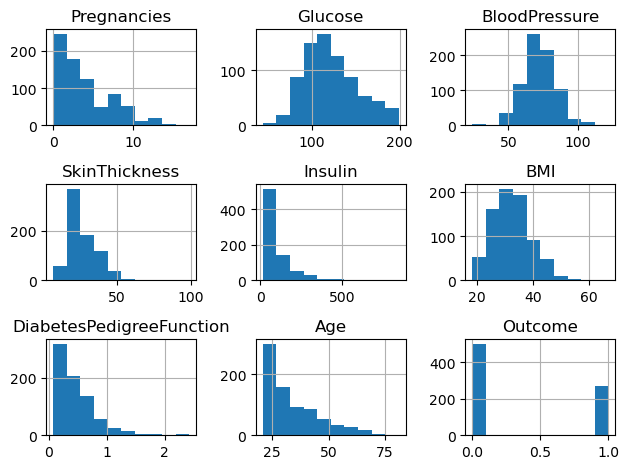

In [22]:
# univariate numerical
df.hist()
plt.tight_layout()
plt.show()

**We see that Preganncies, SkinThickness, DiabetesPedigreeFunction, Age are Right Skewed. These have transformed after coinsulting with domain experts** 

Boxplot for the column  Pregnancies


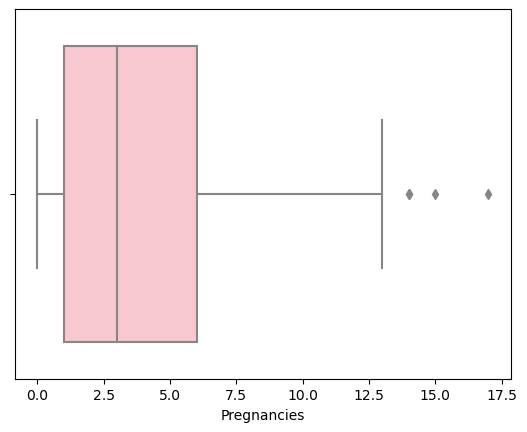

Boxplot for the column  Glucose


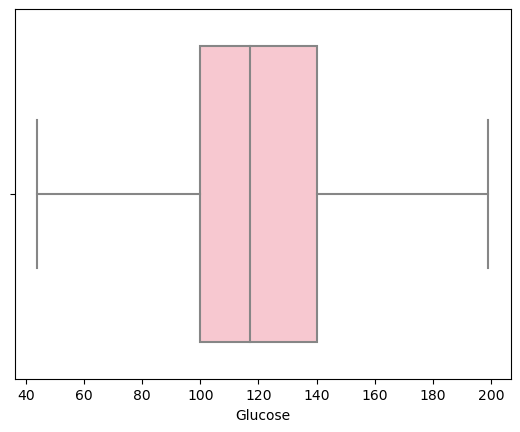

Boxplot for the column  BloodPressure


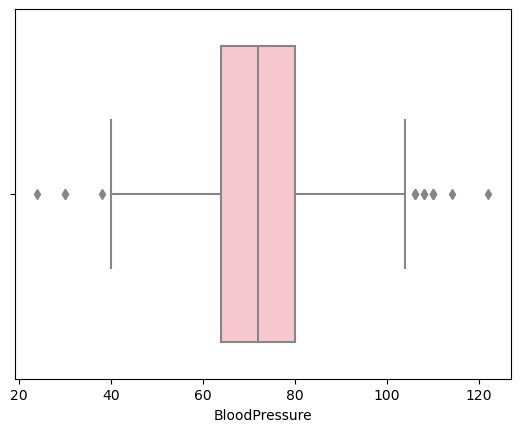

Boxplot for the column  SkinThickness


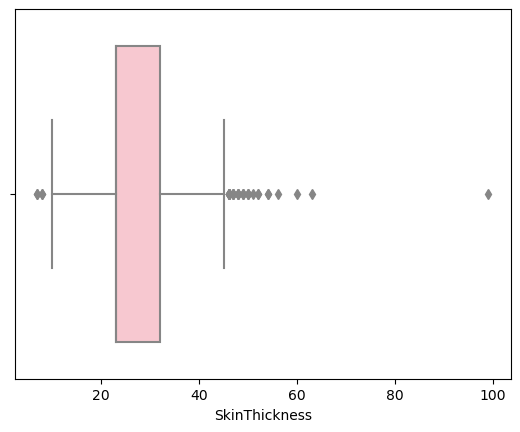

Boxplot for the column  Insulin


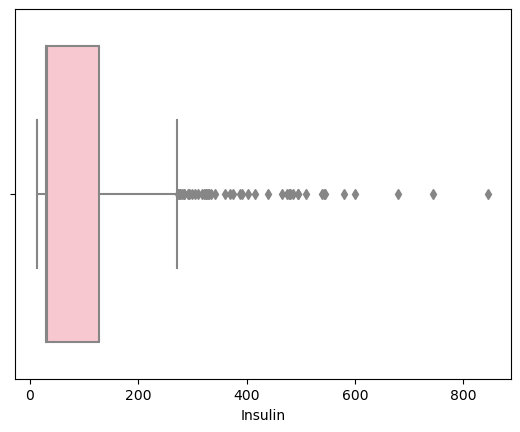

Boxplot for the column  BMI


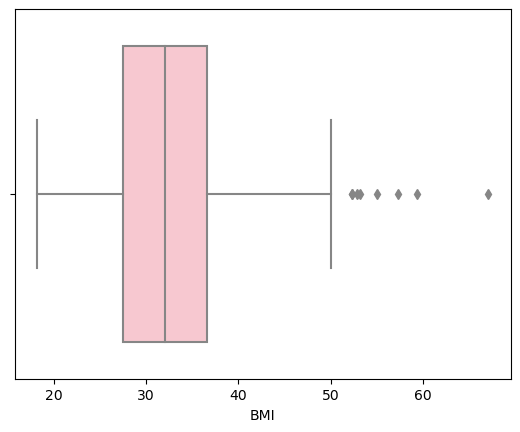

Boxplot for the column  DiabetesPedigreeFunction


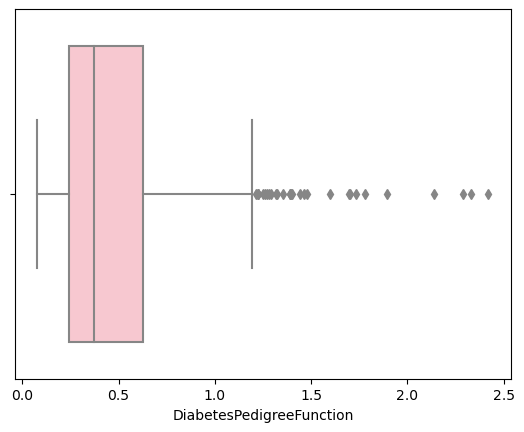

Boxplot for the column  Age


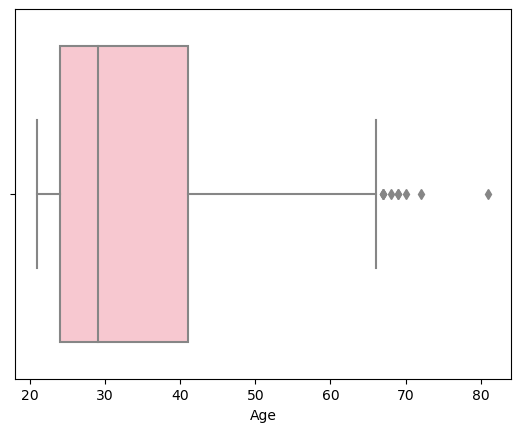

Boxplot for the column  Outcome


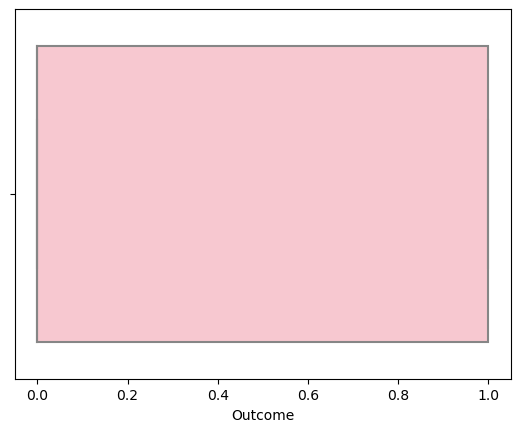

In [23]:
for col in df.select_dtypes(exclude='O').columns:
    print('Boxplot for the column ', col)
    sns.boxplot(data=df, x=col, color='pink')
    plt.show()

**Pregnancies, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedicgreeFunction have lots if outliers which we have to take care wither by cropping or capping after consulting domain experts**

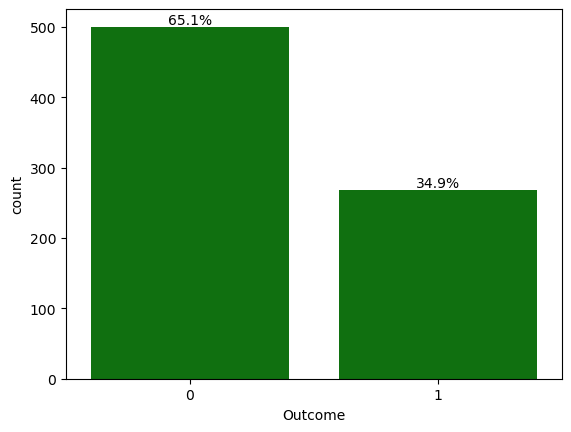

In [24]:
ax=sns.countplot(df,x='Outcome', color='green')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), 
                 ha='center', va='bottom')
plt.show()

In [25]:
plt.style.use("fivethirtyeight")

Bivariate Bar Graph for Outcome vs  Pregnancies


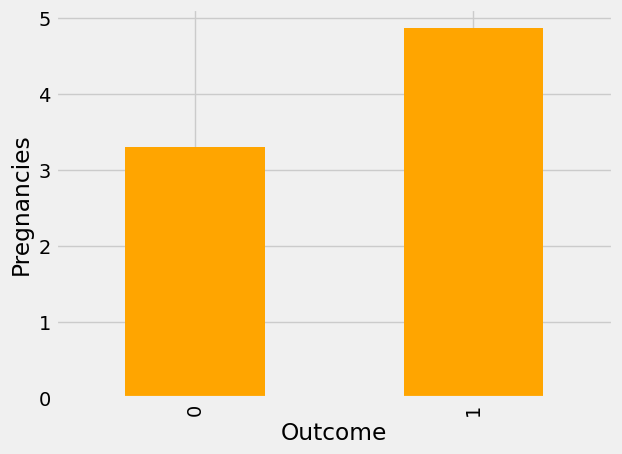

Bivariate Bar Graph for Outcome vs  Glucose


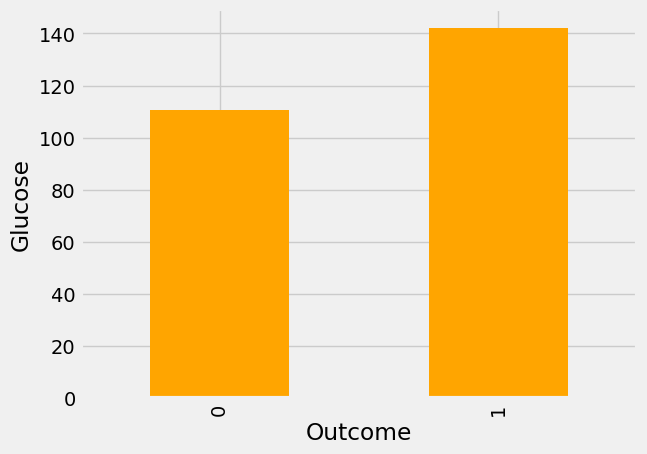

Bivariate Bar Graph for Outcome vs  BloodPressure


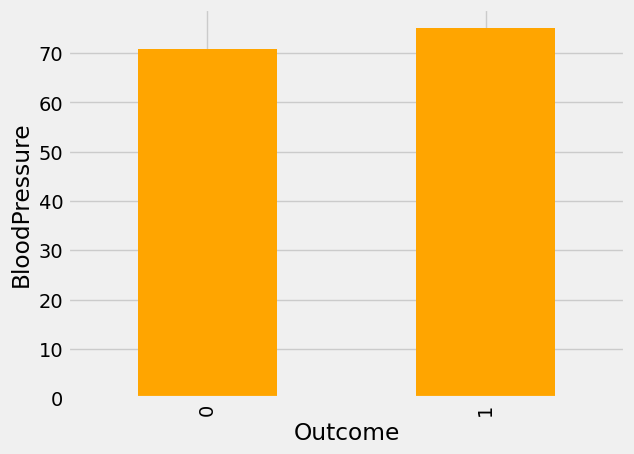

Bivariate Bar Graph for Outcome vs  SkinThickness


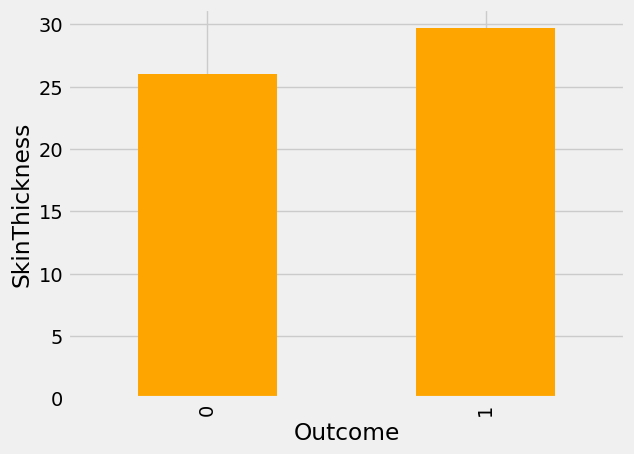

Bivariate Bar Graph for Outcome vs  Insulin


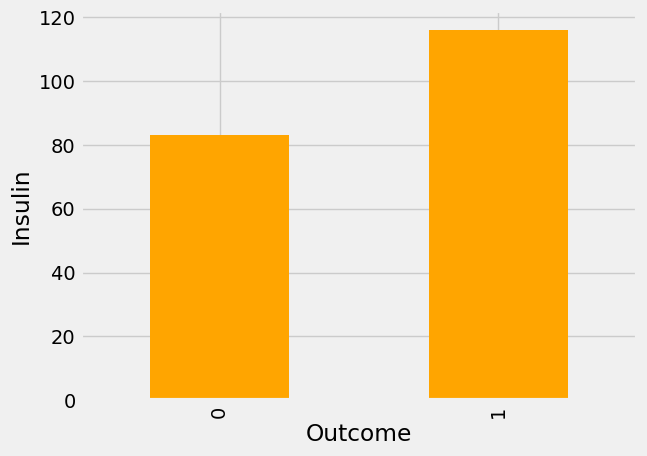

Bivariate Bar Graph for Outcome vs  BMI


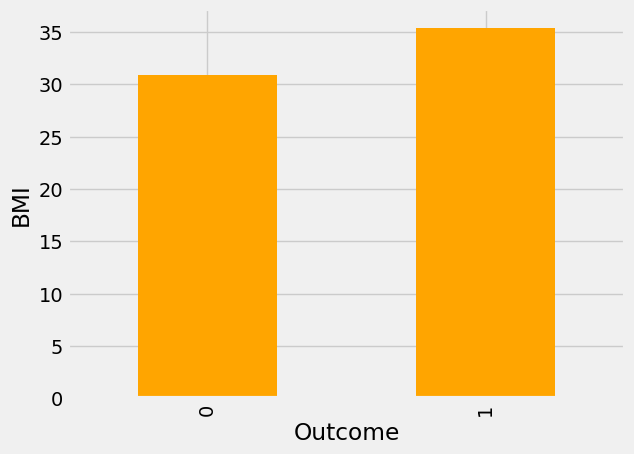

Bivariate Bar Graph for Outcome vs  DiabetesPedigreeFunction


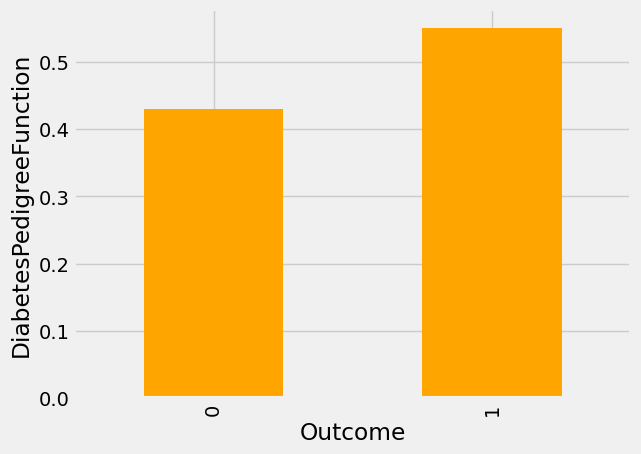

Bivariate Bar Graph for Outcome vs  Age


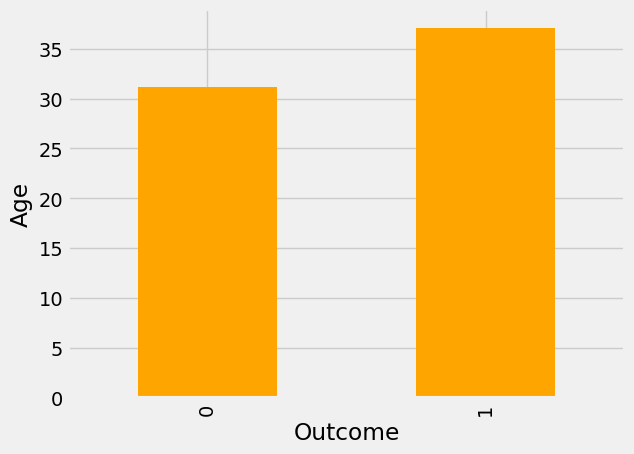

Bivariate Bar Graph for Outcome vs  Outcome


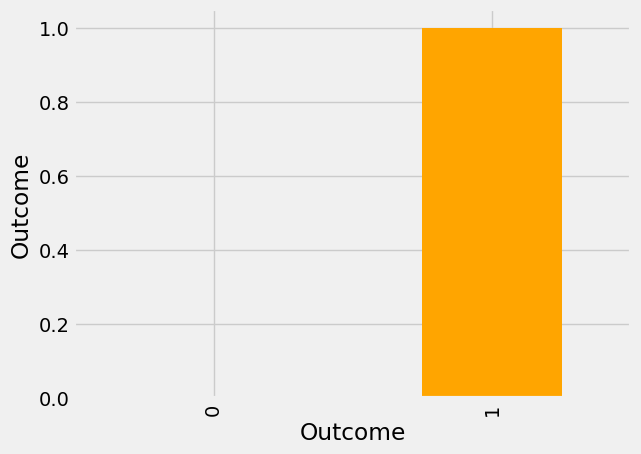

In [26]:
# Bivariates
for col in df.select_dtypes(exclude='O').columns:
    print("Bivariate Bar Graph for Outcome vs ", col)
    df.groupby('Outcome')[col].mean().plot(kind='bar', color='orange')
    plt.ylabel(col)
    plt.show()

**Women who have higher average pregnancies, glucose level, age, BMI, Diabetes Pedigree Function are more likely to be diabetic**

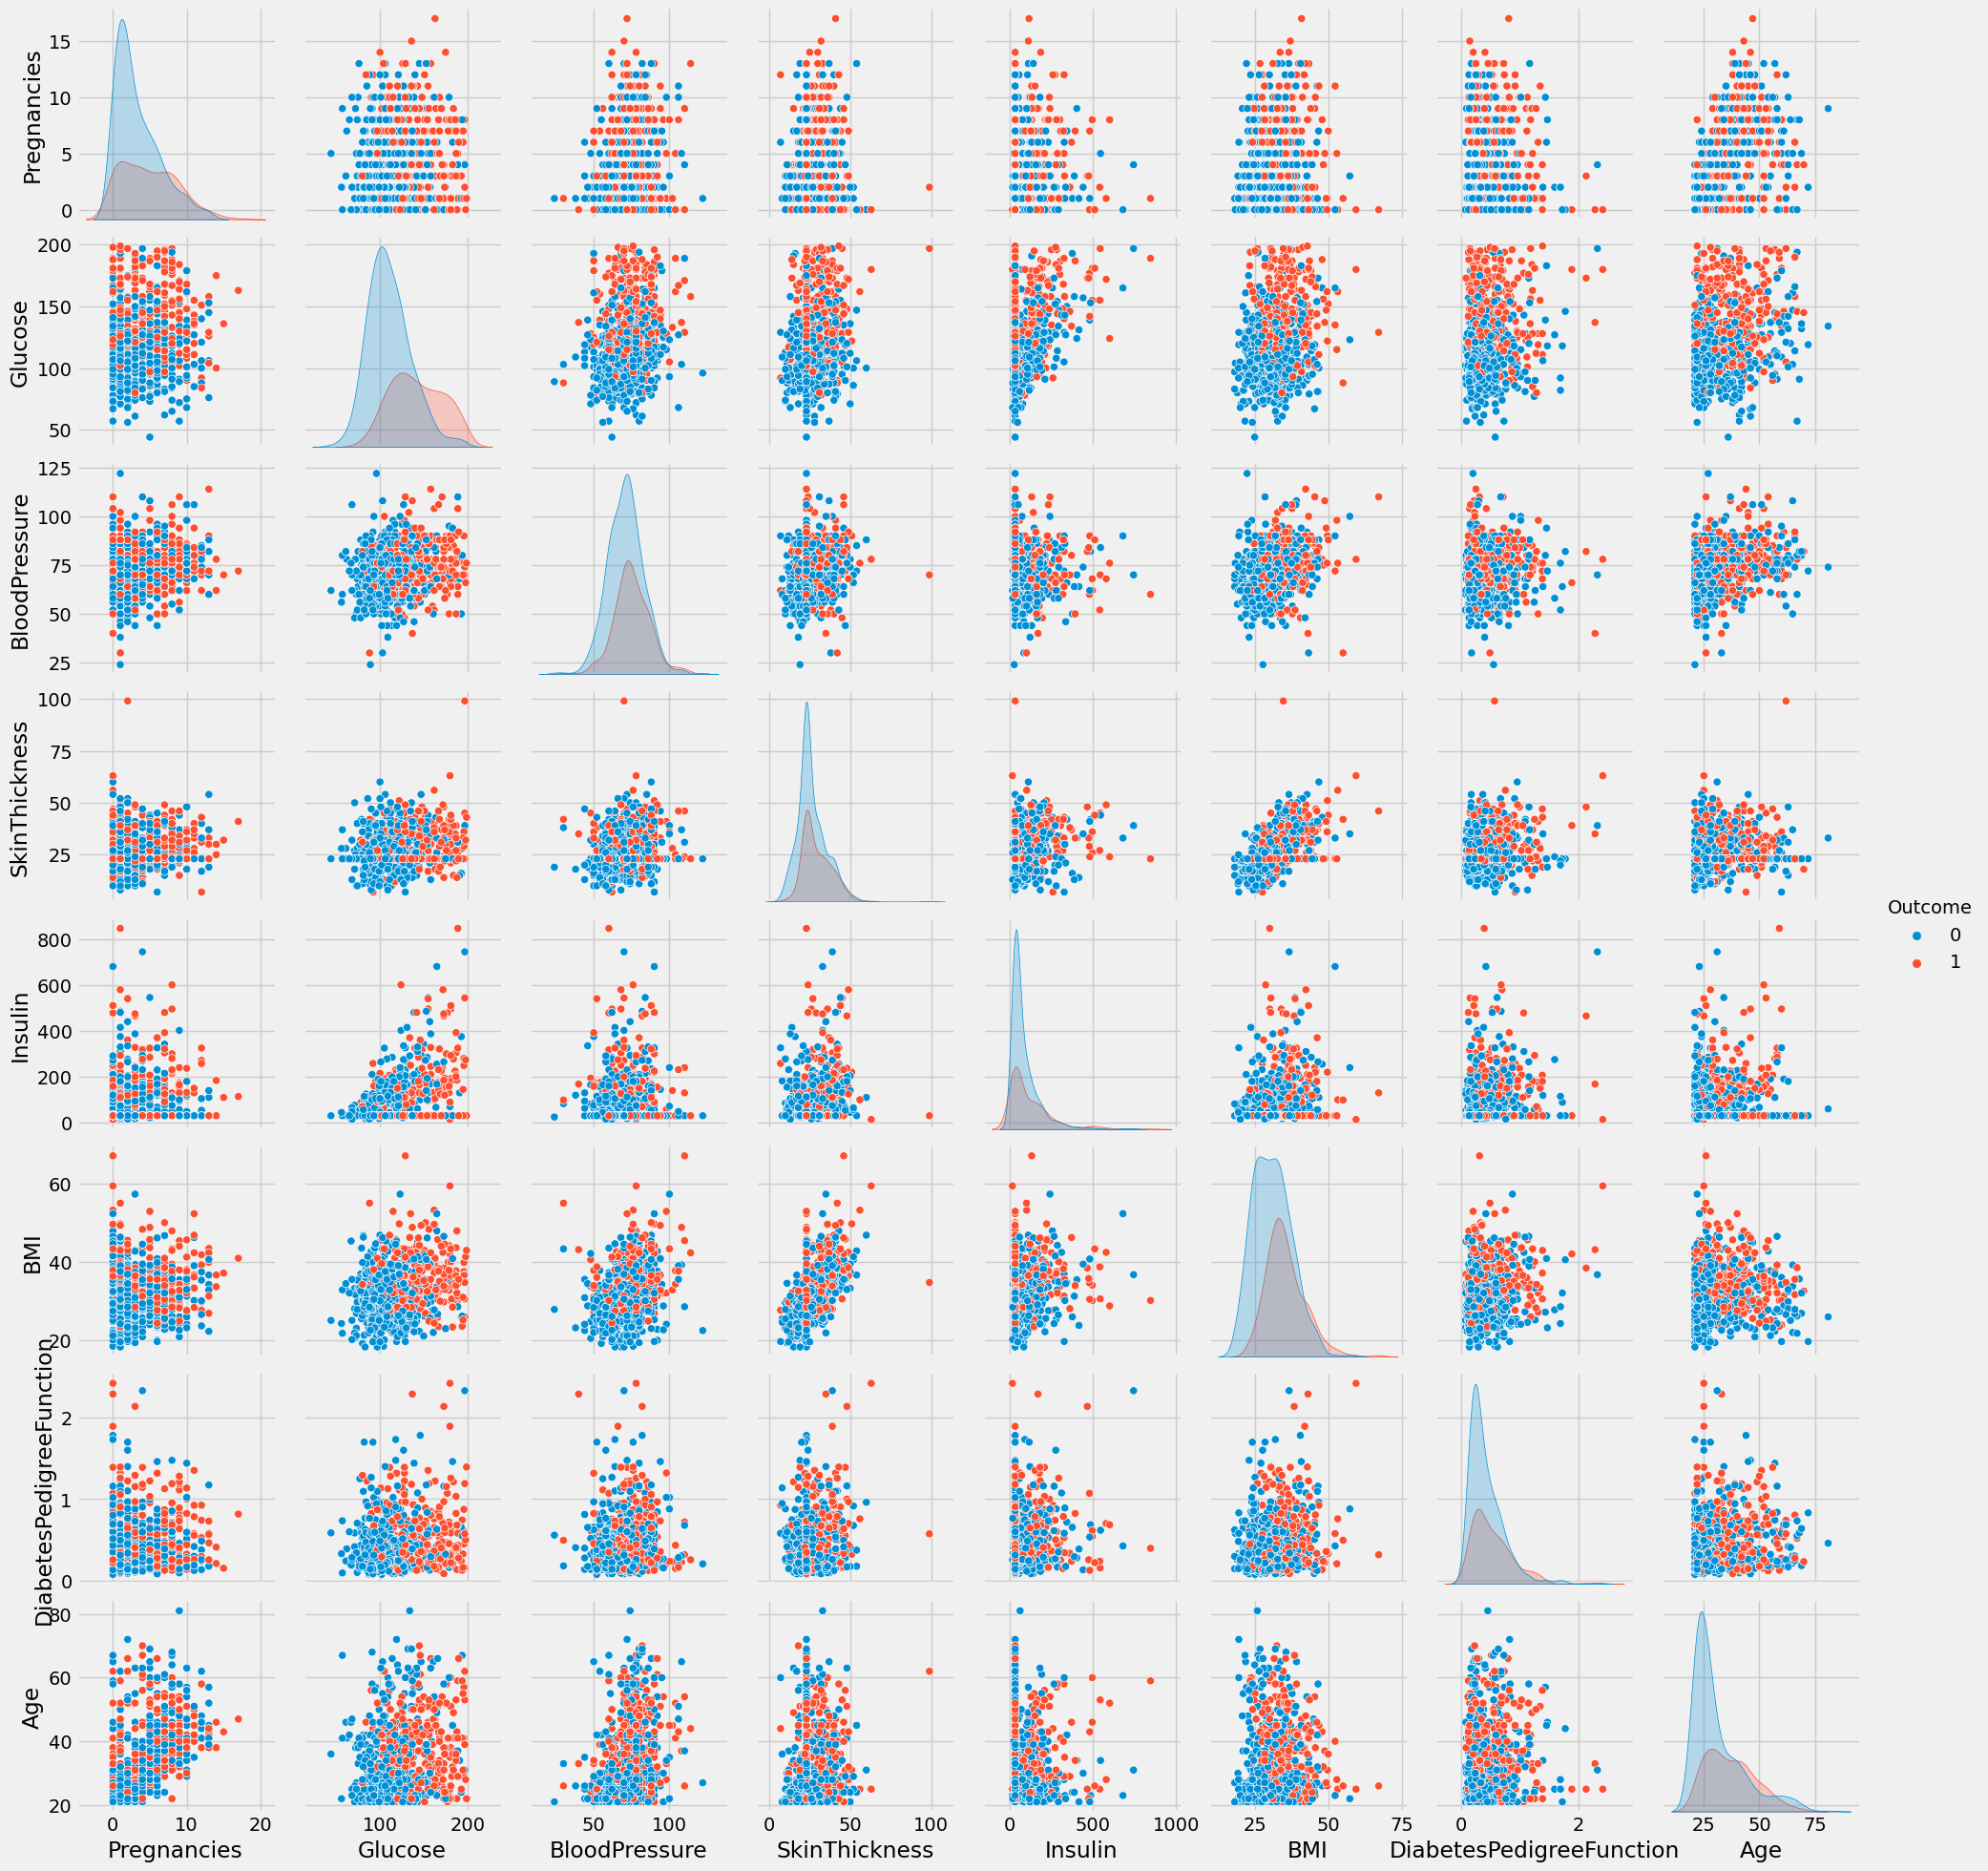

In [27]:
sns.pairplot(df, hue='Outcome')
plt.show()

**we see strong correlation between BMI and SkinThkickness, Glucoise and Insulin , which may have to treat by dropping one in each pair after consulting the domain expert**

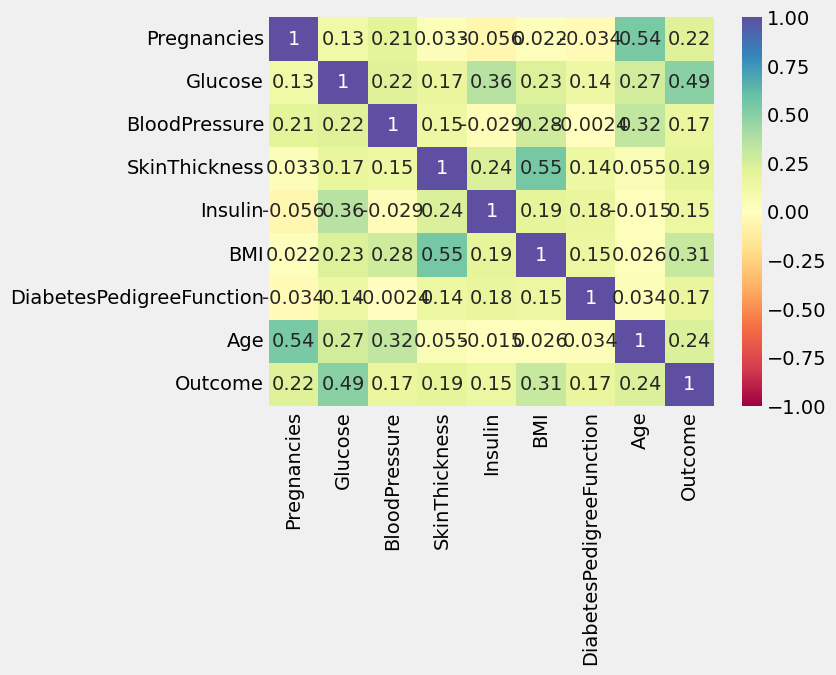

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
plt.show()

**From the heatmap we see that BMI, Glucose and Age are the likely risk factors of diabetes**

**EDA Observations**
1. Univariate Analysis--
2. Bivariate analysis--
3. Correlation Analysis--


### Preprocess the Data for Modelling

In [29]:
# seperate the features and label
X=df.drop('Outcome', axis=1)
y=df.Outcome

In [30]:
# solve for data imbalance 
sm=SMOTE()
X, y=sm.fit_resample(X, y)

In [31]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [32]:
# train test split
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.2, 
                                random_state=101, stratify=y)

In [33]:
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800,)


### Model Fitting and Evaluation

In [34]:
def print_metrics(y_test, y_pred, model_name):
    print("Metrics for model ", model_name)
    print('')
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('')
    print('Recall =', recall_score(y_test, y_pred))
    print('')
    print('Precision =', precision_score(y_test, y_pred))
    print('')
    print('ROC Score =', roc_auc_score(y_test, y_pred))
    print('')
    print('F1 Score =', f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred))
    print('')
    print(classification_report(y_test, y_pred))

In [35]:
# try out a knn model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for model  KNN

Accuracy = 0.775

Recall = 0.84

Precision = 0.7433628318584071

ROC Score = 0.7749999999999999

F1 Score = 0.7887323943661971

[[71 29]
 [16 84]]

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       100
           1       0.74      0.84      0.79       100

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



In [37]:
# fit all the models together
clfs={
    'Logreg':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'Decision Tree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'SVM':SVC(),
    'Xgboost':XGBClassifier()
}

models_report=pd.DataFrame(columns=['model name','accuracy', 'recall', 
                                    'precision', 'f1', 'roc' ])
for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    print('Fitting the model ...', clf_name)
    t=pd.DataFrame({
        'model name':clf_name,
        'accuracy':accuracy_score(y_test, y_pred), 
        'recall':recall_score(y_test, y_pred), 
        'precision':precision_score(y_test, y_pred), 
        'f1':f1_score(y_test, y_pred), 
        'roc':roc_auc_score(y_test, y_pred)
    },index=[0])
    models_report=pd.concat([models_report,t], ignore_index=True)

models_report=models_report.sort_values(by='f1', ascending=False)
models_report

Fitting the model ... Logreg
Fitting the model ... Naive Bayes
Fitting the model ... Decision Tree
Fitting the model ... RandomForest
Fitting the model ... GradientBoost
Fitting the model ... SVM
Fitting the model ... Xgboost


,model name,accuracy,recall,precision,f1,roc
3,RandomForest,0.845,0.85,0.841584,0.845771,0.845
4,GradientBoost,0.825,0.84,0.815534,0.827586,0.825
6,Xgboost,0.820,0.85,0.801887,0.825243,0.820
2,Decision Tree,0.785,0.75,0.806452,0.777202,0.785
0,Logreg,0.745,0.69,0.775281,0.730159,0.745
1,Naive Bayes,0.720,0.62,0.775000,0.688889,0.720
5,SVM,0.700,0.66,0.717391,0.687500,0.700


**Random Forest has performed best on this data so we can optmize it**

In [38]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
param_dist={
    'n_estimators':range(100, 1000, 100),
    'max_depth':range(10, 100, 5),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2, 20, 2),
    'max_features':['log2', 'sqrt'],
    'criterion':['entropy', 'gini'] }
n_folds=10
cv=RandomizedSearchCV(estimator=rfc,param_distributions=param_dist,
                      n_jobs=-1,
                      verbose=3, cv=n_folds, scoring='f1', 
                      return_train_score=True
                      ,n_iter=10)
cv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(10, 100, 5),
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 20, 2),
                                        'n_estimators': range(100, 1000, 100)},
                   return_train_score=True, scoring='f1', verbose=3)

In [40]:
cv.best_score_

0.8164105160385919

In [41]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=70, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=500)

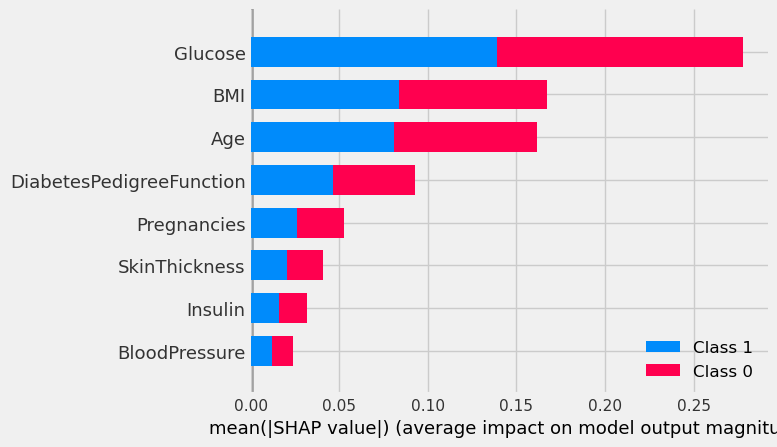

In [43]:
# interpret the model
import shap 
best_rfc=cv.best_estimator_
value=shap.TreeExplainer(best_rfc).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=X.columns)

The interpretation also shows that Glusoce, BMI and Age are strongest predictors of diabetes

# Step 9:Deploy The Model In Streamlit

In [44]:
#picke the best model
model=open('rfc.picke','wb')
pickle.dump(best_rfc,model)
model.close()

In [45]:
#load the pickled model
model=open('rfc.picke','rb')
clf=pickle.load(model)
model.close()

In [46]:
data=[[3,100,80,23,1901,33,2.6,44]]
clf.predict(data)[0]

1

In [49]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("Medical Diagnostic Web App⚕")

st.subheader("Does the patient have diabetes?")
df = pd.read_csv("diabetes.csv")

if st.sidebar.checkbox("View Data", False):
    st.write(df)
    
if st.sidebar.checkbox("View Distributions", False):
    st.write(df)
    df.hist()
    plt.tight_layout()
    st.pyplot()
# Step 1: Load the pickeled model

model=open('rfc.pickle','rb')
clf=pickle.load(model)
model.close()

# Step 2: Get the front end user input

pregs = st.number_input('Pregnancies', 0, 20, 0)
plas = st.slider('Glucose', 40, 200, 40)
pres = st.slider('BloodPressure', 20, 150, 20)
skin = st.slider('SkinThickness', 7, 99, 7)
insulin = st.slider('Insulin', 14, 850, 14)
bmi = st.slider('BMI', 18, 70, 18) 
dpf = st.slider('DiabetesPedigreeFunction', 0.05, 2.50, 0.05)
age = st.slider('Age',21,90,21)

#step3 get the model input
input_data=[[pregs, plas,pres, skin, insulin, bmi, dpf, age]]

#Step 4: Get the prediction and print the result
prediction = clf.predict(input_data)[0]
if st.button('Predict'):
    if prediction == 0:
        st.subheader("Non Diabetic")
    else:
        st.subheader("Diabetic")

Overwriting app.py


In [52]:
print(st.__version__)

1.28.0


In [54]:
import sklearn
print(sklearn.__version__)

1.3.0


In [55]:
print(pd.__version__)

2.0.3


In [57]:
import matplotlib
print(matplotlib.__version__)

3.7.2


In [59]:
print(np.__version__)

1.24.3
